 # Mental Health Trends
 ## Created by Shiyin Liang, Jordan Levy, Sarat Sreepathy

In [573]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Purpose

    For a long time, people have been making a distinction between "body" and "mind". One of the most famous
    theories in philosphy is Renee Descartes's mindy-body dualism--the mind and body are two seperate entites
    with no effect on each other. But this sentiment has reached areas further that philosphy; it is affecting
    how we view mental health. We don't understand that our mental health is a big part of our overall physical
    health and that mental health IS physical health. In recent years though, there seems to be a growing 
    movement for mental health awareness. Schools are bringing in therapy dogs for students to relieve stress,
    mental health are trending conversations on our social media platforms and mental health awareness month is
    getting bigger every year. It certainly seems that more people are starting to understand that mental health
    and physical health are intertwined. But is this trend really as prevalent as it seems? 

    In this project, we are interested in exploring whether this phenomenon is happening in data as much as we 
    see it happening in daily life. Procedurraly, we will try to determine if there is a correlation between 
    people's perception of their mental health and people's perception of their overall physical health. If 
    people are indeed including their mental health state as part of their overall health state, then there
    should be a positive relationship--when people have more mentally unhealthy days, there should be more 
    people self-rating their health as poor. Otherwise, there should be no relationship between the two
    variables.

# Data Cleaning/Preprocessing

    On Filtering Columns:
    There is a lot of data and variables in this dataset but most are unnecessary for our project. The main 
    variables that are important to our project are year, location, question, and the response.
    We will delete columns in  the second and third stratification categories and response column since they
    are mostly null values.
    
    On Filtering Rows:
    We are interested in data where the question is related to mental health and how people rate their physical
    health. After using the buzzwords "mental health" and "self rated", we determined that only the questions:
    "Recent mentally unhealthy days among adults aged >= 18 years" and "Fair or poor self-rated health status 
    among adults aged >= 18 years" are relevant to our goal. We chose not to use the other questions containing
    the words mental health because they were specific to women and the question "Fair or poor self-rated health
    status among adults aged >= 18 years" was not. Since a dataset with only these two questions would have erred 
    on the small side, we decided that we could also look at the questions exploring poverty, amount of 
    sleep, and access to health care as new metrics of mental health as studies show that these parameters 
    have an effect on mental health. We also only focused on the rows where the stratification was overall and
    ignored the ones for gender and race because we are only interested in statistics for the general population.

# Data Visualization
    
    First, we began with a simple exploratory chart of the trends for mentally unhealthy days variable and
    self-rated health variable to see if they might show any resemblance of a relationship. We divided this 
    data into regions to make the visualizations a little easier to analyze if there were only 9 things 
    happening simultaneously rather than 50. It seems that the two variables might have a positive relationship
    with each other in East North Central, Middle Atlantic, Mountain, New England, Pacific, and West North 
    Central regions. Only two graphs seem to show no relationship. But we still need to definitively prove this.

/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


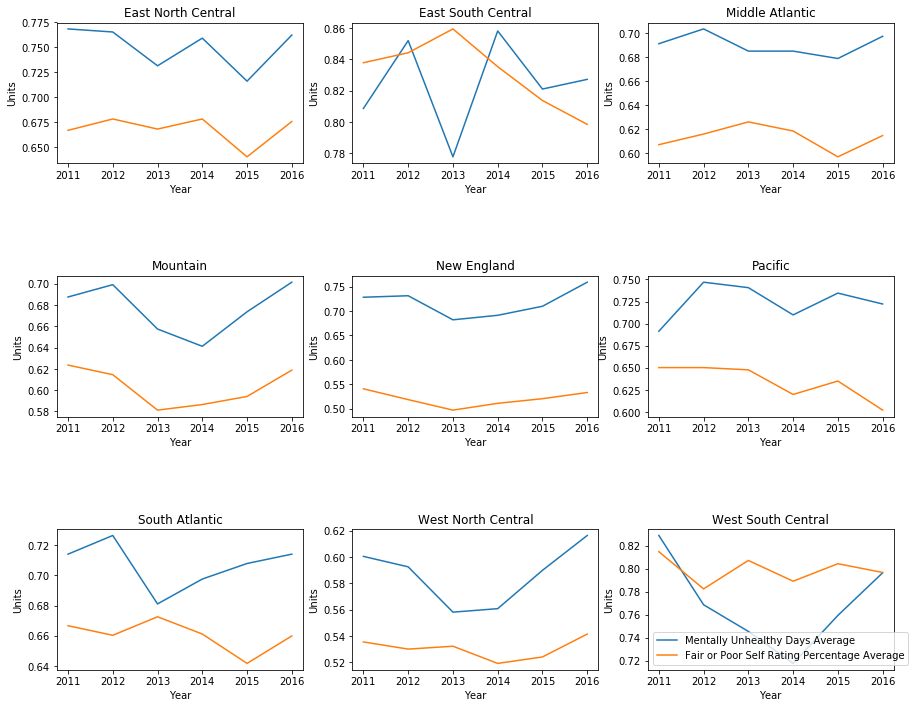

In [572]:
data = pd.read_csv("U.S._Chronic_Disease_Indicators__CDI_.csv")
data.insert(0, 'Year', data['YearStart'])
cols = ['YearStart', 'YearEnd','Response','StratificationCategory2','Stratification2','StratificationCategory3','Stratification3','StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3','StratificationID3','ResponseID','TopicID','DataValueFootnoteSymbol']
data = data.drop(cols, axis=1).reset_index(drop=True)

topics = data['Topic'].value_counts(normalize=True)
states = data['LocationAbbr'].unique()
regions_dict = {"AL":"East South Central", "AR":"West South Central", "AZ":"Mountain", 
                "CA":"Pacific", "CO":"Mountain", "CT":"New England", 
                "DC":"South Atlantic", "DE": "South Atlantic", 
                "FL":"South Atlantic", 
                "GA": "South Atlantic",
                "IA": "West North Central", "ID":"Mountain", "IL":"East North Central", "IN":"East North Central",
                "KS": "West North Central", "KY": "East North Central",
                "LA": "West South Central", 
                "MA":"New England", "MD":"South Atlantic", "ME":"New England","MI":"East North Central","MN":"West North Central", "MO": "West North Central", "MS": "East South Central", "MT":"Mountain",
                "NC":"South Atlantic", "ND": "West North Central", "NE": "West North Central", "NH":"New England", "NJ": "Middle Atlantic", "NM": "Mountain", "NV": "Mountain", "NY": "Middle Atlantic",
                "OH": "East North Central", "OK": "West South Central", "OR":"Pacific", 
                "PA": "Middle Atlantic", 
                "RI": "New England",
                "SC":"South Atlantic", "SD": "West North Central", 
                "TN":"East South Central", "TX":"West South Central",
                "UT": "Mountain",
                "VA": "South Atlantic", "VT":"New England", 
                "WA":"Pacific", "WI":"East North Central", "WV":"South Atlantic", "WY": "Mountain"
                
}

data = data[data['LocationAbbr'].isin(regions_dict.keys())]


data['Region'] = data['LocationAbbr'].map(regions_dict)
self_rated = data.loc[data['Question'].str.contains('self-rated')]
mental = data.loc[data['Topic'] == 'Mental Health']
mental = mental.loc[mental['Question'].str.contains('adults')]
mental['DataValue'] = mental['DataValue'].astype(float)


mental = mental[mental['StratificationCategoryID1']=='OVERALL']


mental_gb = mental.groupby(['Year', 'DataValueType'])['DataValue'].mean()

self_rated['DataValue'] = self_rated['DataValue'].astype(float)
self_rated = self_rated[self_rated['StratificationCategoryID1']=='OVERALL']

self_rated_gb = self_rated.groupby(['Year', 'DataValueType'])['DataValue'].mean()
self_rated_pivot = self_rated.pivot_table(values='DataValue', index='Year', columns='DataValueType',
                                         aggfunc='mean')
mental_pivot = mental.pivot_table(values='DataValue', index='Year', columns='DataValueType', aggfunc='mean')
mental_reg = mental.pivot_table(values='DataValue', index=['Year', 'Region'], columns='DataValueType',
                               aggfunc='mean')
self_rated_reg = self_rated.pivot_table(values='DataValue', index=['Year', 'Region'], columns='DataValueType',
                               aggfunc='mean')
ov = data.loc[data['Topic']=='Overarching Conditions']
ov['DataValue'] = ov['DataValue'].astype(float)
ov_pivot = ov.pivot_table(values='DataValue', index=['Year', 'Region'], columns='Question', aggfunc='mean')

self_rated['DataValue'] = self_rated['DataValue']/self_rated['DataValue'].max()

self_rated[['DataValueUnit','DataValueType']].head()

self_rated_reg = self_rated.pivot_table(values='DataValue', index=['Region', 'Year'], columns='DataValueType',
                                       aggfunc='mean')



mental['DataValue'] = mental['DataValue']/mental['DataValue'].max()
mental_reg = mental.pivot_table(values='DataValue', index=['Region', 'Year'], columns='DataValueType',
                               aggfunc='mean')


MW_SR_ENC = mental_reg[0:6].merge(self_rated_reg[0:6], left_on="Year", right_on="Year")
MW_SR_ENC = MW_SR_ENC.drop(columns=['Mean', 'Crude Prevalence'])

MW_SR_ESC = mental_reg[6:12].merge(self_rated_reg[6:12], left_on="Year", right_on="Year")
MW_SR_ESC = MW_SR_ESC.drop(columns=['Mean', 'Crude Prevalence'])

MW_SR_MA = mental_reg[12:18].merge(self_rated_reg[12:18], left_on="Year", right_on="Year")
MW_SR_MA = MW_SR_MA.drop(columns=['Mean', 'Crude Prevalence'])

MW_SR_M = mental_reg[18:24].merge(self_rated_reg[18:24], left_on="Year", right_on="Year")
MW_SR_M = MW_SR_M.drop(columns=['Mean', 'Crude Prevalence'])

MW_SR_NE = mental_reg[24:30].merge(self_rated_reg[24:30], left_on="Year", right_on="Year")
MW_SR_NE = MW_SR_NE.drop(columns=['Mean', 'Crude Prevalence'])

MW_SR_P = mental_reg[30:36].merge(self_rated_reg[30:36], left_on="Year", right_on="Year")
MW_SR_P = MW_SR_P.drop(columns=['Mean', 'Crude Prevalence'])

MW_SR_SA = mental_reg[36:42].merge(self_rated_reg[36:42], left_on="Year", right_on="Year")
MW_SR_SA = MW_SR_SA.drop(columns=['Mean', 'Crude Prevalence'])

MW_SR_WNC = mental_reg[42:48].merge(self_rated_reg[42:48], left_on="Year", right_on="Year")
MW_SR_WNC = MW_SR_WNC.drop(columns=['Mean', 'Crude Prevalence'])

MW_SR_WSC = mental_reg[48:54].merge(self_rated_reg[48:54], left_on="Year", right_on="Year")
MW_SR_WSC = MW_SR_WSC.drop(columns=['Mean', 'Crude Prevalence'])



fig, ([ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9]) = plt.subplots(3,3,figsize=(15,10))
plt.subplots_adjust(top=0.9,bottom=0.001,right=0.9,wspace=0.2,hspace=0.8)

MW_SR_ENC.plot(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Units')
ax1.set_title("East North Central")
ax1.get_legend().remove()

MW_SR_ESC.plot(ax=ax2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Units')
ax2.set_title("East South Central")
ax2.get_legend().remove()


MW_SR_MA.plot(ax=ax3)
ax3.set_xlabel('Year')
ax3.set_ylabel('Units')
ax3.set_title("Middle Atlantic")
ax3.get_legend().remove()

MW_SR_M.plot(ax=ax4)
ax4.set_xlabel('Year')
ax4.set_ylabel('Units')
ax4.set_title("Mountain")
ax4.get_legend().remove()

MW_SR_NE.plot(ax=ax5)
ax5.set_xlabel('Year')
ax5.set_ylabel('Units')
ax5.set_title("New England")
ax5.get_legend().remove()

MW_SR_P.plot(ax=ax6)
ax6.set_xlabel('Year')
ax6.set_ylabel('Units')
ax6.set_title("Pacific")
ax6.get_legend().remove()

MW_SR_SA.plot(ax=ax7)
ax7.set_xlabel('Year')
ax7.set_ylabel('Units')
ax7.set_title("South Atlantic")
ax7.get_legend().remove()

MW_SR_WNC.plot(ax=ax8)
ax8.set_xlabel('Year')
ax8.set_ylabel('Units')
ax8.set_title("West North Central")
ax8.get_legend().remove()

MW_SR_WSC.plot(ax=ax9)
ax9.set_xlabel('Year')
ax9.set_ylabel('Units')
ax9.set_title("West South Central")
ax9.legend(bbox_to_anchor=(5, 2))

ax9.legend(['Mentally Unhealthy Days Average','Fair or Poor Self Rating Percentage Average'])

In [575]:
data = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')
mental_health = data[data['Topic']=='Mental Health'].reset_index(drop=True)
mth_copy = mental_health.copy()
overarching_cond = data[data['Topic'] == 'Overarching Conditions'].reset_index(drop=True)
ovc_copy = overarching_cond.copy()


def data_clean(df, strat_by):
    df['Year'] = df['YearStart']
    drop_cols = ['YearStart','Response','ResponseID','YearEnd','StratificationCategory2','Stratification2','StratificationCategory3', \
            'Stratification3','StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', \
            'StratificationID3', 'LocationDesc', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID']
    df = df[df['StratificationCategoryID1'] == strat_by]
    return df.drop(drop_cols, axis=1)
mental_health = data_clean(mental_health, 'OVERALL')
overarching_cond = data_clean(overarching_cond, 'OVERALL')

mental_health_race = data_clean(mth_copy, 'RACE')
overarching_cond_race = data_clean(ovc_copy, 'RACE')

mental_health = mental_health.loc[mental_health['Question'].str.contains('Recent mentally unhealthy days')].reset_index(drop=True)
mental_health = mental_health[mental_health['DataValueType'].str.contains('adj')].reset_index(drop=True)

In [576]:
over_qs = ['Prevalence of sufficient sleep among adults aged >= 18 years',
       'High school completion among adults aged 18-24 years',
       'Recent physically unhealthy days among adults aged >= 18 years',
       'Current lack of health insurance among adults aged 18-64 years',
       'Poverty', 'Gini Index of income inequality',
       'Fair or poor self-rated health status among adults aged >= 18 years']

ov_questions = pd.DataFrame()

for q in over_qs:
    subset = overarching_cond[overarching_cond['Question'] == q]
    ov_questions = ov_questions.append(subset)
ov_questions = ov_questions.reset_index(drop=True)

ov_questions['DataValue'] = ov_questions['DataValue'].astype('float')
ov_questions[['Question','Year','LocationAbbr','DataValue']].groupby(['Year','LocationAbbr','Question']).apply(lambda x: x['DataValue'].reset_index(drop=True)[0])
ov_pivot = ov_questions.pivot_table(values='DataValue', index=['Year', 'LocationAbbr'], columns='Question', aggfunc='mean')
ov_questions[ov_questions['Question'] == 'Prevalence of sufficient sleep among adults aged >= 18 years']['Year'].unique()



array([2014, 2012, 2016, 2013])

In [579]:
usa = gpd.read_file('states_21basic/states.shp')
comb_data = mental_health.merge(ov_pivot, on=['Year', 'LocationAbbr'])
drop_comb_cols = ['DataSource', 'Topic', 'DataValueUnit', 'DataValueType', 'DataValueAlt', 'DataValueFootnoteSymbol',\
                  'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', \
                  'Stratification1', 'StratificationCategoryID1', 'StratificationID1']
comb_data = comb_data.drop(drop_comb_cols, axis=1).reset_index(drop=True)
mth_q = comb_data['Question'].unique()[0]
comb_data[mth_q] = comb_data['DataValue'].astype('float')
comb_data = comb_data.drop(['Question', 'DataValue'], axis=1)
comb_data = comb_data.drop(['Prevalence of sufficient sleep among adults aged >= 18 years', \
                            'Gini Index of income inequality'], axis=1)

region_dict = dict(zip(usa['STATE_ABBR'], usa['SUB_REGION']))
comb_data['Region'] = comb_data['LocationAbbr'].replace(region_dict)
comb_data = comb_data.drop(comb_data[comb_data['Poverty'].isnull()].index).reset_index(drop=True)
comb_data = comb_data[comb_data['Region'] != 'PR'].reset_index(drop=True)

comb_data = comb_data.join(pd.get_dummies(comb_data['Region']))
comb_data = comb_data.drop(comb_data[comb_data['GeoLocation'].isnull()].index).reset_index(drop=True)

comb_data['Latitude'] = comb_data['GeoLocation'].apply(lambda x: float(tuple(x.strip(')').strip('(').split(','))[0]))
comb_data['Longitude'] = comb_data['GeoLocation'].apply(lambda x: float(tuple(x.strip(')').strip('(').split(','))[1].strip(' ')))

quant_cols = ['Current lack of health insurance among adults aged 18-64 years', 'Fair or poor self-rated health status among adults aged >= 18 years','High school completion among adults aged 18-24 years','Poverty','Recent physically unhealthy days among adults aged >= 18 years', 'Latitude', 'Longitude']
test_cols = ['Current lack of health insurance among adults aged 18-64 years', 'Fair or poor self-rated health status among adults aged >= 18 years','High school completion among adults aged 18-24 years','Poverty','Recent physically unhealthy days among adults aged >= 18 years', 'Latitude', 'Longitude']
regions = ['MW', 'NC', 'NE', 'NY', 'National', 'S', 'W']
for region in set(region_dict.values()):
    test_cols.append(region)
test_q = 'Recent mentally unhealthy days among adults aged >= 18 years'

    The following r2 scores give a univariate analysis on quantitative columns and our depenndent variable, number of recent mentally unhealthy days.

/Users/sueanne/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/sueanne/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


r2_score Current lack of health insurance among adults aged 18-64 years:  0.05793939833024686
r2_score Fair or poor self-rated health status among adults aged >= 18 years:  0.5483932285019927


/Users/sueanne/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/sueanne/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


r2_score High school completion among adults aged 18-24 years:  0.10562772794151931
r2_score Poverty:  0.33620027489237303


/Users/sueanne/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/sueanne/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


r2_score Recent physically unhealthy days among adults aged >= 18 years:  0.7752863527844187
r2_score Latitude:  0.06822672121242568


/Users/sueanne/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


r2_score Longitude:  0.09355263194429331


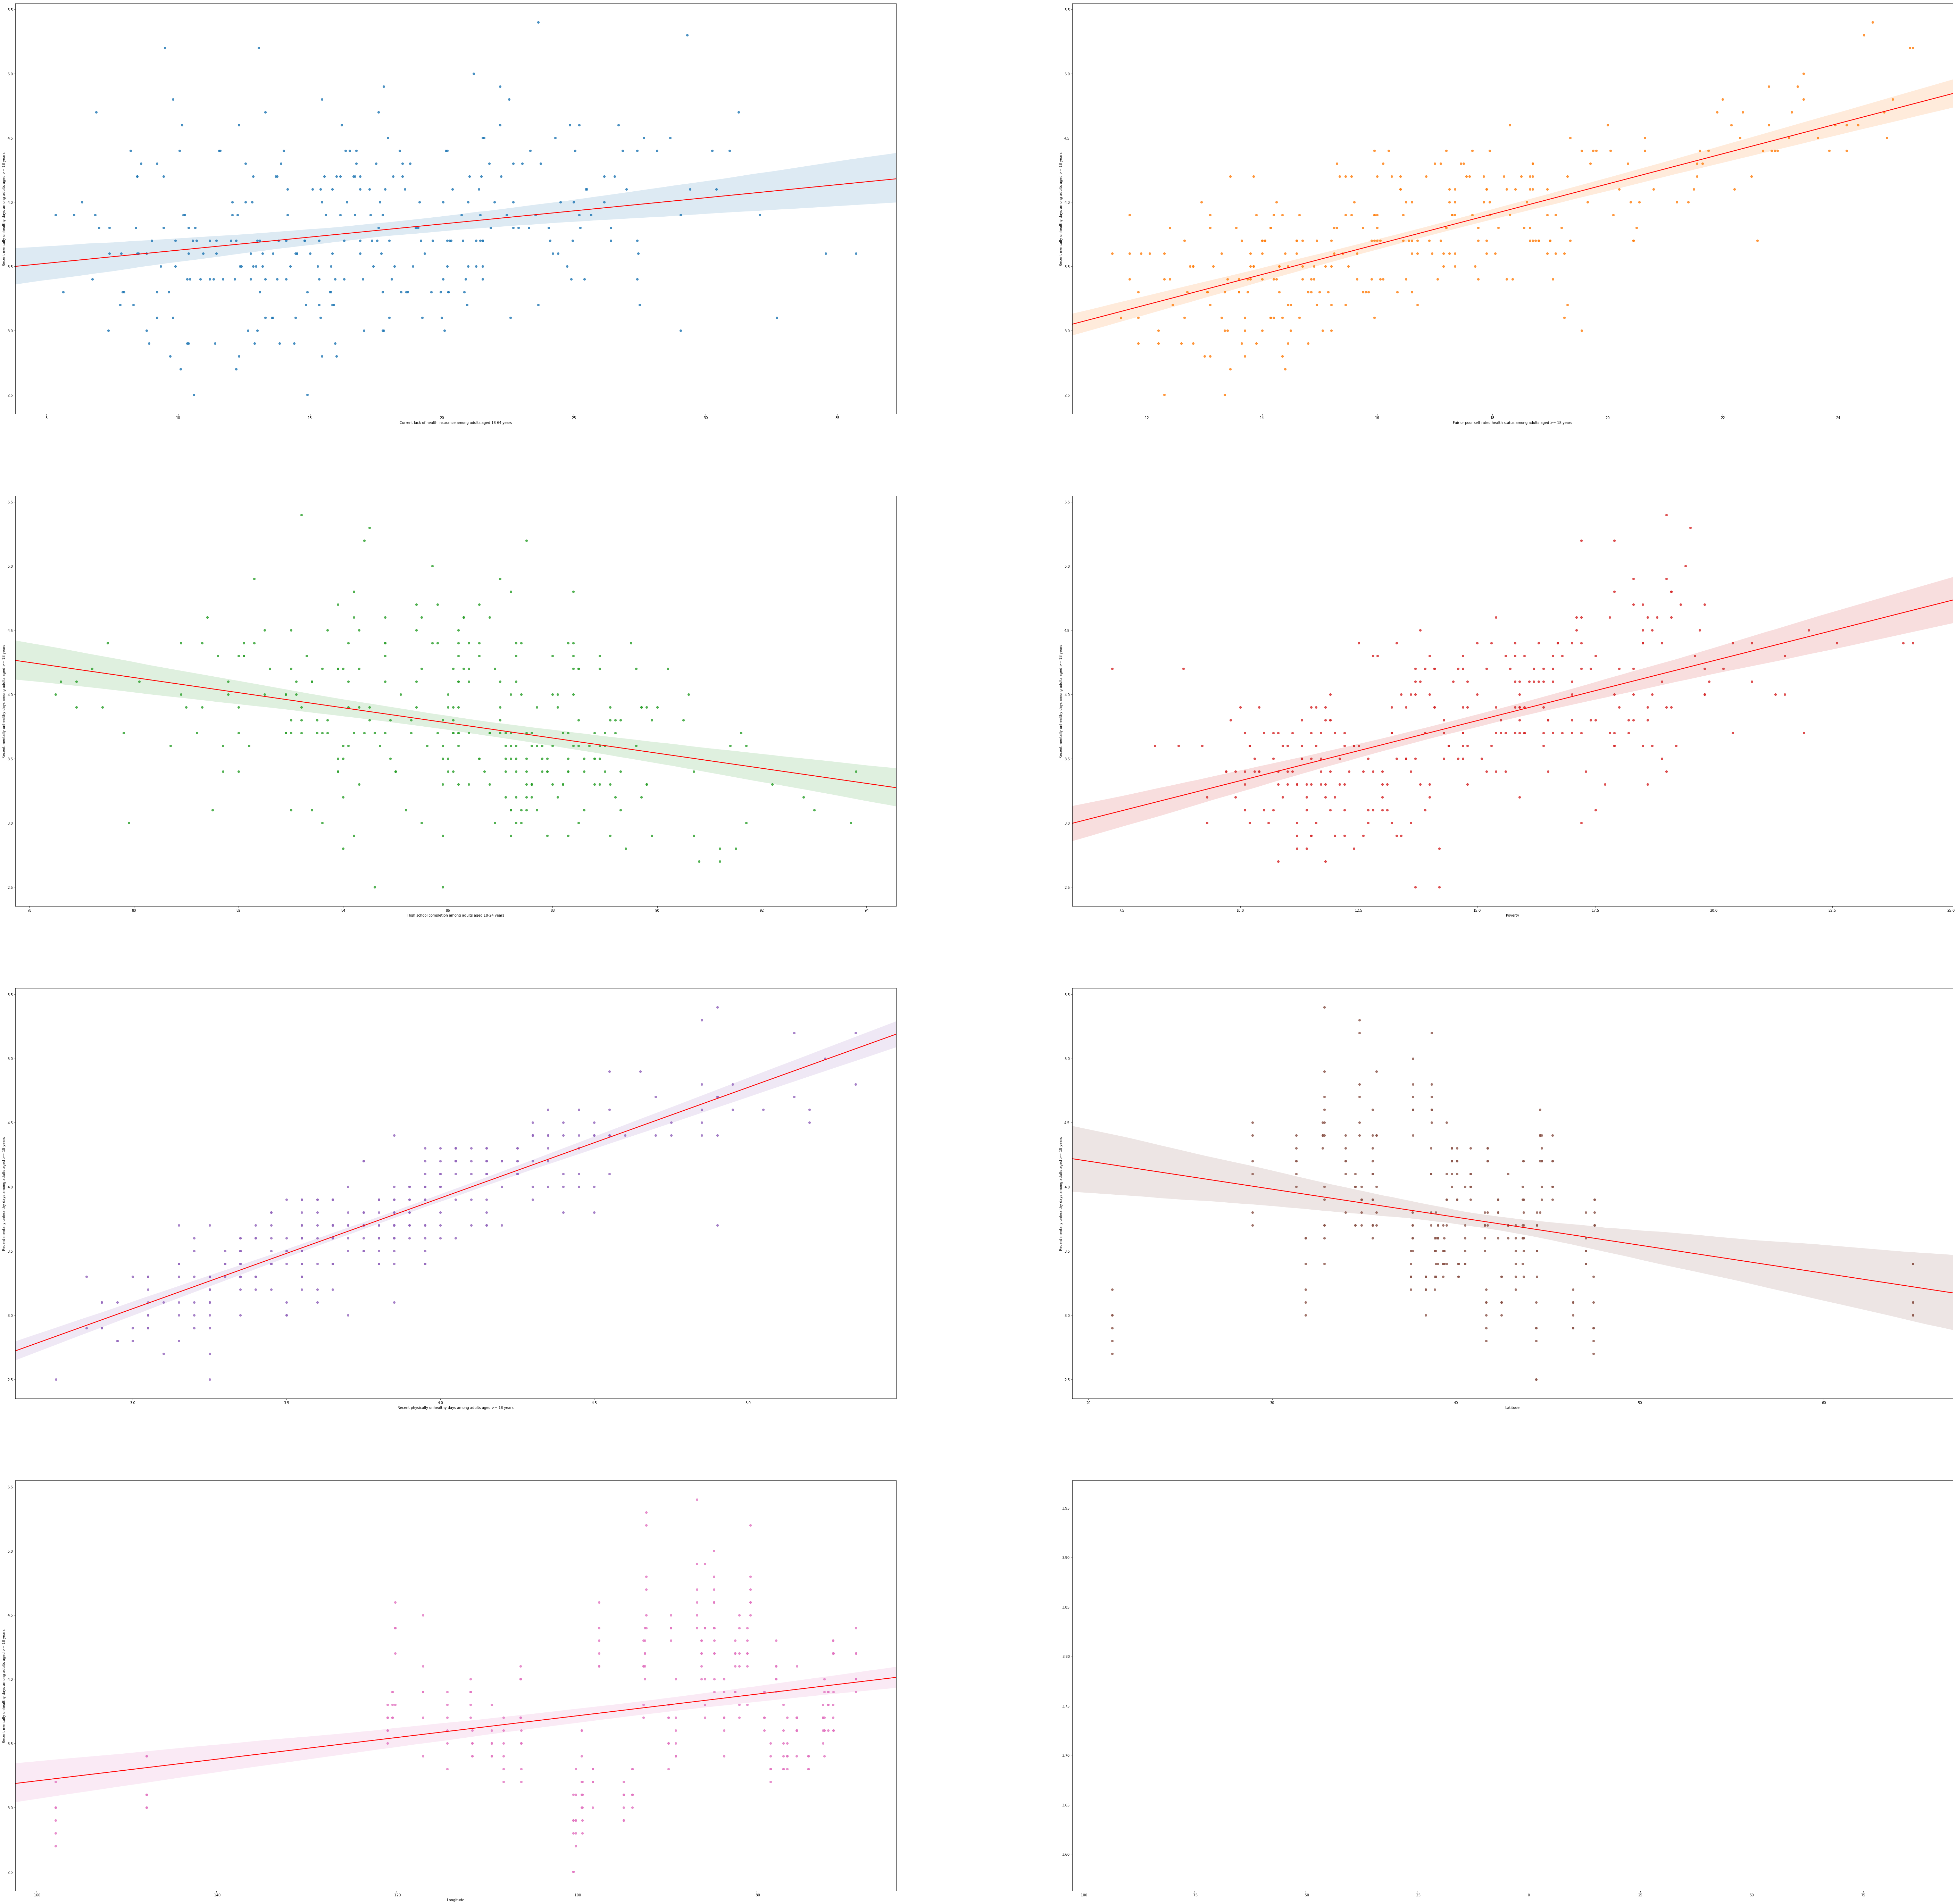

In [580]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(100, 100))
i=0
j = 0
for col in quant_cols:
    #for yr in range(2011,2017):
    #comb_data_yr = comb_data[comb_data['Year'] == yr
    #comb_data.plot.scatter(col, test_q, ax=axes[int(i/2),i%2], figsize=(30,30))
    lin_best = sns.regplot(comb_data[col], comb_data[test_q], ax=axes[int(i/2),i%2])
    regline = lin_best.get_lines()[0]
    regline.set_color('red')
    lr = LinearRegression()
    #X_train, X_test, y_train, y_test = train_test_split(],)
    lr.fit(comb_data[[col]],  comb_data[[test_q]])
    print('r2_score {}: '.format(col), lr.score(comb_data[[col]], comb_data[[test_q]]))
    i+=1
    #print('{} r2_score:'.format(col), r2_score(comb_data[col], comb_data['Recent mentally unhealthy days among adults aged >= 18 years']))

/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


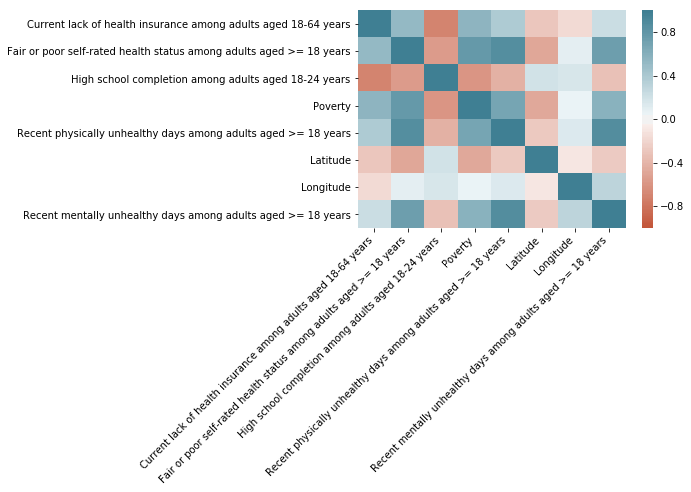

In [581]:
X = comb_data[test_cols]
y = comb_data['Recent mentally unhealthy days among adults aged >= 18 years']

def standardize_col(df, col_name):
    col = df[col_name]
    return (col - col.mean()) / col.std()

X_sc = pd.DataFrame()
for col in quant_cols:
    X_sc[col] = standardize_col(X, col)
    
for col in set(region_dict.values()):
    X_sc[col] = X[col]

corr_X = X_sc[quant_cols]
corr_X['Recent mentally unhealthy days among adults aged >= 18 years'] = y

corr = corr_X.corr()
corr_y = corr['Recent mentally unhealthy days among adults aged >= 18 years']

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

    This is a correlation plot showing different correlations between our predictive variables and dependet variable.

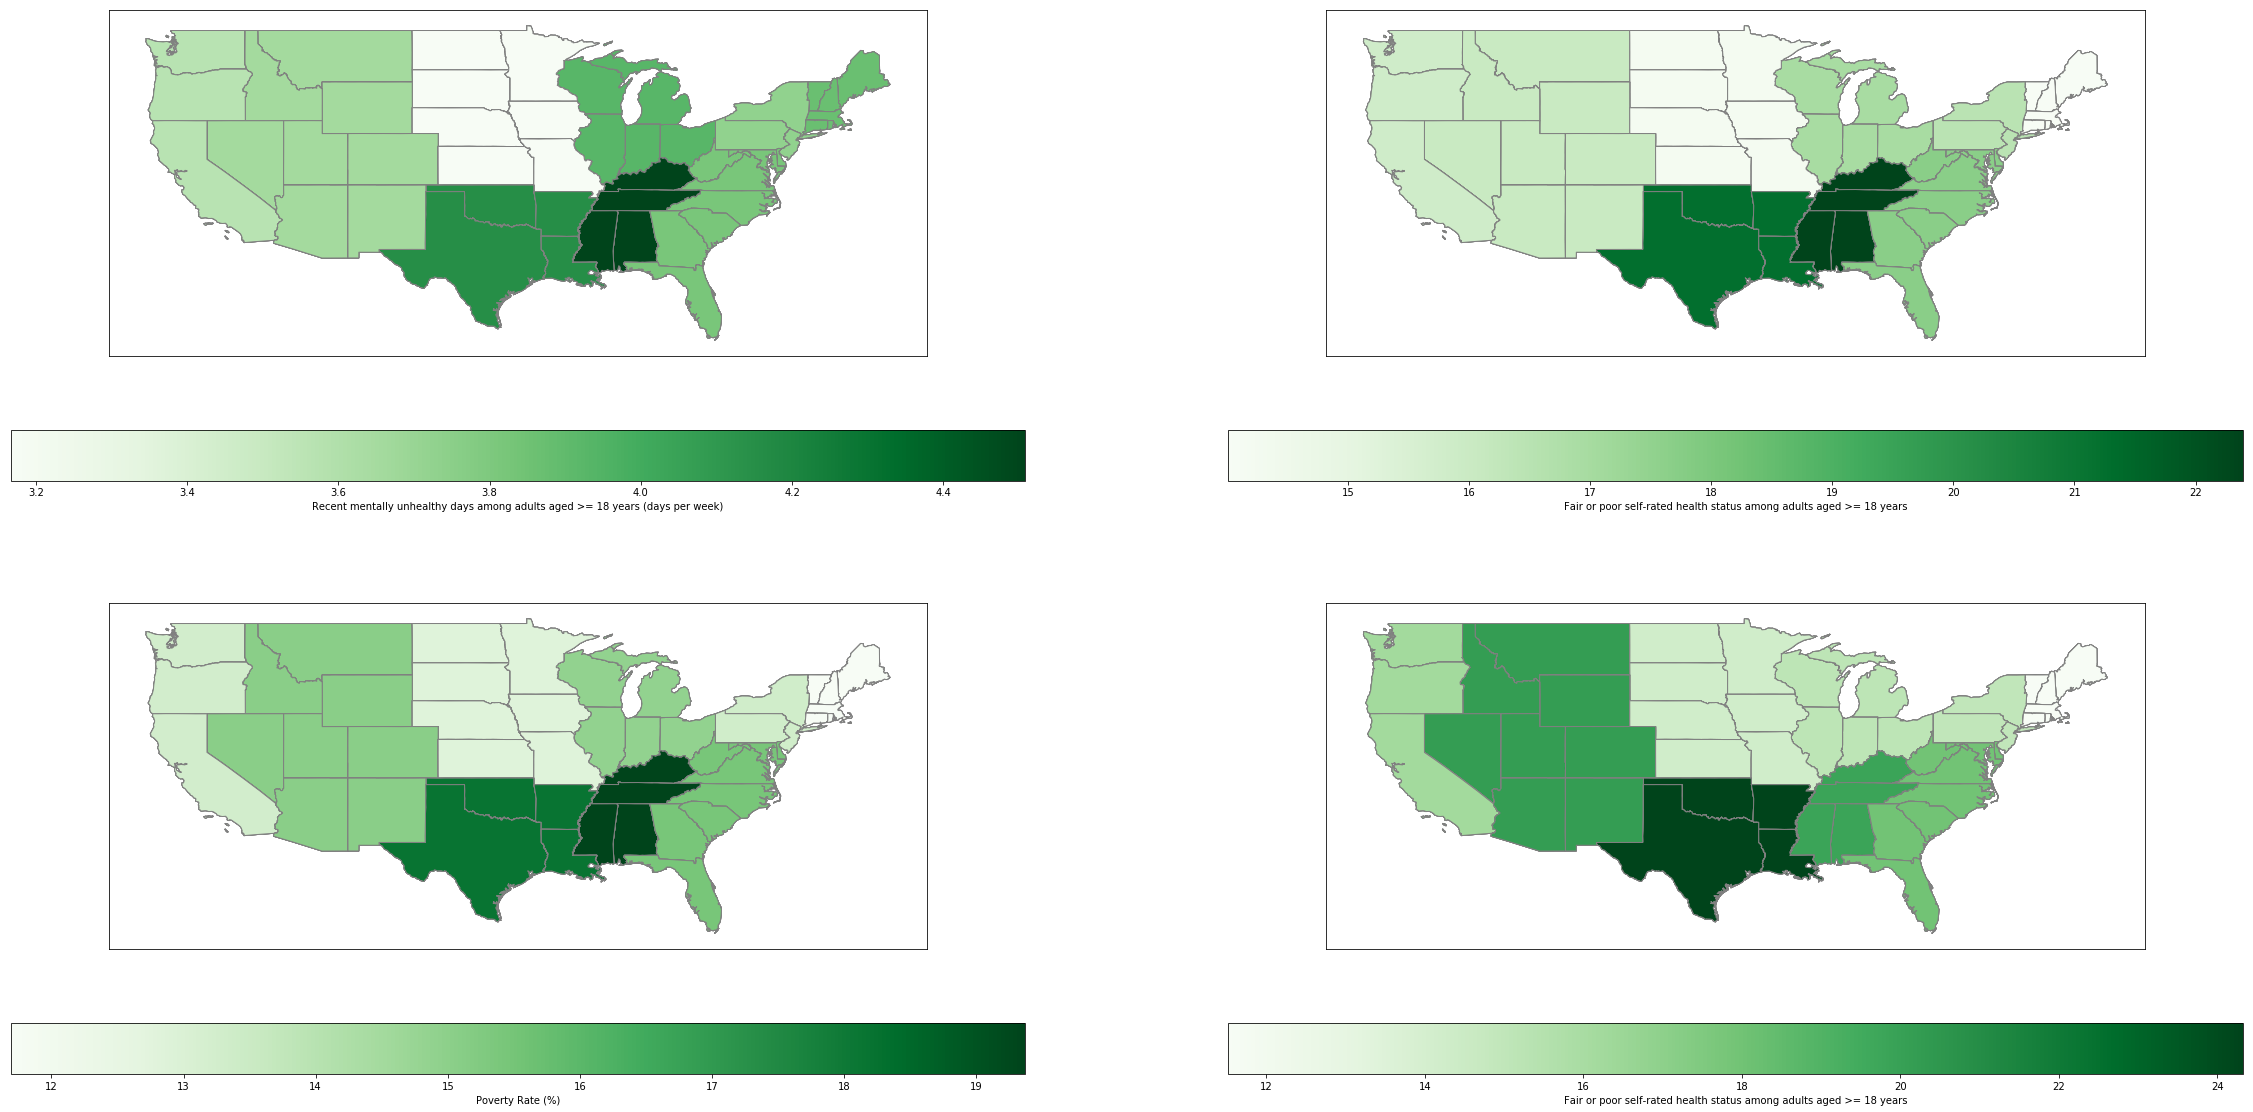

In [582]:
usa_comb = usa.merge(comb_data, right_on='LocationAbbr', left_on='STATE_ABBR')

region_vals = usa_comb.groupby('SUB_REGION')[test_q].apply(np.mean)
region_pov = usa_comb.groupby('SUB_REGION')['Poverty'].apply(np.mean)
region_health = usa_comb.groupby('SUB_REGION')['Current lack of health insurance among adults aged 18-64 years'].apply(np.mean)
region_ovr_health = usa_comb.groupby('SUB_REGION')['Fair or poor self-rated health status among adults aged >= 18 years'].apply(np.mean)

usa_comb['Region_Mean'] = usa_comb['SUB_REGION'].replace(region_vals)
usa_comb['Poverty_Region'] = usa_comb['SUB_REGION'].replace(region_pov)
usa_comb['Health_Region'] = usa_comb['SUB_REGION'].replace(region_health)
usa_comb['Overall_Health_Region'] = usa_comb['SUB_REGION'].replace(region_ovr_health)

usa_comb = usa_comb[(usa_comb['STATE_ABBR'] != 'AK') & (usa_comb['STATE_ABBR'] != 'HI')].reset_index(drop=True)

fig, ([ax_1,ax_2], [ax_3, ax_4]) = plt.subplots(nrows=2, ncols=2, figsize=(40, 20))
ax = usa_comb.plot(column='Region_Mean',
              cmap='Greens', 
              legend=True,
              legend_kwds={'label': test_q+' (days per week)',
                'orientation': "horizontal"},
             figsize = (8,6),
             edgecolor='gray',
             ax=ax_1);
ax.set_xticks([]);
ax.set_yticks([]);

ax2 = usa_comb.plot(column='Overall_Health_Region',
              cmap='Greens', 
              legend=True,
              legend_kwds={'label':'Fair or poor self-rated health status among adults aged >= 18 years',
                'orientation': "horizontal"},
             figsize = (8,6),
             edgecolor='gray',
                    ax=ax_2
             );

ax2.set_xticks([]);
ax2.set_yticks([]);

ax3 = usa_comb.plot(column='Poverty_Region',
              cmap='Greens', 
              legend=True,
              legend_kwds={'label': 'Poverty Rate (%)',
                'orientation': "horizontal"},
             figsize = (8,6),
                   edgecolor='gray',
                    ax=ax_3
             );
ax3.set_xticks([]);
ax3.set_yticks([]);

ax4 = usa_comb.plot(column='Health_Region',
              cmap='Greens', 
              legend=True,
              legend_kwds={'label':'Fair or poor self-rated health status among adults aged >= 18 years',
                'orientation': "horizontal"},
             figsize = (8,6),
             edgecolor='gray',
                    ax=ax_4
             );
ax4.set_xticks([]);
ax4.set_yticks([]);

    Now that we have visualized some of the similarities between proportions across the US, we will predict number of recent mentally unhealthy days based on the most predictive survey questions.

In [583]:
def lin_reg_pred_days(t_size):
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=t_size)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    return mean_squared_error(pred, y_test), r2_score(pred, y_test), lr.coef_

In [584]:
%%time
mse = []
r2 = []
coef = []
for i in range(100):
    m, r, c = lin_reg_pred_days(0.33)
    mse.append(m)
    r2.append(r)
    coef.append(c)

CPU times: user 506 ms, sys: 5.68 ms, total: 512 ms
Wall time: 277 ms


In [585]:
print('Average r2 score (over 100 iterations):',np.mean(r2))

Average r2 score (over 100 iterations): 0.7747841182985361


In [ ]:
print('Average r2 score (over 100 iterations):',np.mean(r2))

    When testing our model on 33% of our data, our predictions were, on average, 0.05 days away from the actual recent mentally unhealthy days within the last week.

In [586]:
print('Average MSE (over 100 iterations):',np.mean(mse))

Average MSE (over 100 iterations): 0.05058748751584354


In [589]:
comb = comb_data.copy()
p_vals_1 = []
for yr in comb_data['Year'].unique():
    comb_yr = comb.loc[comb['Year'] == yr]
    means = []
    col = standardize_col(comb_yr, 'Recent mentally unhealthy days among adults aged >= 18 years')
    fair = standardize_col(comb_yr, 'Fair or poor self-rated health status among adults aged >= 18 years')
    for _ in range(1000):
        samp = col.sample(replace=False, frac=1).reset_index(drop=True)
        diff = np.mean(samp - fair)
        means.append(diff)
    obs = np.mean(col - fair)
    p_val_1 = np.count_nonzero(pd.Series(means) > obs) / 1000
    p_vals_1.append(p_val_1)
p_vals_1
p_vals_1 = pd.Series(p_vals_1)
p_vals_1.index = comb_data['Year'].unique()

p_vals_2 = []
for yr in comb_data['Year'].unique():
    comb_yr = comb.loc[comb['Year'] == yr]
    means = []
    col = standardize_col(comb_yr, 'Recent mentally unhealthy days among adults aged >= 18 years')
    fair = standardize_col(comb_yr, 'Recent physically unhealthy days among adults aged >= 18 years')
    for _ in range(1000):
        samp = col.sample(replace=False, frac=1).reset_index(drop=True)
        diff = np.mean(samp - fair)
        means.append(diff)
    obs = np.mean(col - fair)
    p_val_2 = np.count_nonzero(pd.Series(means) > obs) / 1000
    p_vals_2.append(p_val_2)
p_vals_2 = pd.Series(p_vals_2)
p_vals_2.index = comb_data['Year'].unique()

p_vals_3 = []
for yr in comb_data['Year'].unique():
    comb_yr = comb.loc[comb['Year'] == yr]
    means = []
    col = standardize_col(comb_yr, 'Recent mentally unhealthy days among adults aged >= 18 years')
    fair = standardize_col(comb_yr, 'Poverty')
    for _ in range(1000):
        samp = col.sample(replace=False, frac=1).reset_index(drop=True)
        diff = np.mean(samp - fair)
        means.append(diff)
    obs = np.mean(col - fair)
    p_val_3 = np.count_nonzero(pd.Series(means) > obs) / 1000
    p_vals_3.append(p_val_3)
p_vals_3 = pd.Series(p_vals_3)
p_vals_3.index = comb_data['Year'].unique()

p_vals_list = [p_vals_1, p_vals_2, p_vals_3]
p_val_df = pd.DataFrame(p_vals_list)
p_val_df.index = pd.Series(['Fair or poor self-rated health status among adults aged >= 18 years', 'Recent physically unhealthy days among adults aged >= 18 years', 'Poverty'])
p_val_df

,2016,2013,2012,2014,2015,2011
Fair or poor self-rated health status among adults aged >= 18 years,0.196,0.250,0.016,0.042,0.622,0.617
Recent physically unhealthy days among adults aged >= 18 years,0.162,0.510,0.011,0.030,0.820,0.655
Poverty,0.131,0.041,0.090,0.097,0.675,0.703


    One question we explored in this dataset was the effect that fair or poor recently unhealthy days, recent physically unhealthy days, and poverty had on recent mentally unhealthy days. For each question, we first standardized the values for both questions. Our null hypothesis was that there was no relationship between the questions like fair or poor recently unhealthy days had on recent mentally unhealthy days. We set the columns of the table to be each of the individual questions and we standardized the data value to be able to compare the questions. We then performed a permutation test to calculate the mean of the differences between the questions’ standardized data values following the null hypothesis and compared it to the observed difference of means between the two questions. Our statistic we used was the difference of means between the two standardized columns. We calculated p_values or probability of getting a value as extreme as the observed difference in means. We calculated p_values for each year for each question. For fair or poor health, 2012 and 2014 had significant p values suggesting a relationship between recent mentally unhealthy days for these years.  For recent physically unhealthy days, 2012 and 2014 had significant p values suggesting a relationship between recent mentally unhealthy days for these years.  For poverty, there were no years with significant values so we could not reject the null hypothesis that there was no relationship between the two questions.


# Conclusion

    We could find a significant trend over the years when it came to the relationship between questions like 
    fair or poor health status and recent mentally unhealthy days. Some years like 2012 and 2014 showed 
    significant values but others did not show enough significance so we were able to learn a little about 
    the relationship between different questions regarding mental health over the years and what might 
    affect it.  After performing univariate analysis, we found number of recent physically unnhealthy days
    to be most correlated with menntally unhealthy days, showing a connection between physical and mental health.
    There is some evidence to show that people are indeed accounting mental health as a part of 
    their physical health but we would not say that our results are very conclusive, as the data is limited.  In 
    the future, we would like to collect more data on questions relating to mental health and how people 
    perceive it in comparison to their overall health.  Additionally, it would be helpful to have more 
    information on how education impacts mental health awareness.